<a href="https://colab.research.google.com/github/20adityasingh/MLPractice3/blob/master/MLPractice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('default of credit card clients.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [6]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,,,,,,,,,,,,,,,,,,,,,
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253


In [7]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df.drop('ID', axis=1, inplace=True)

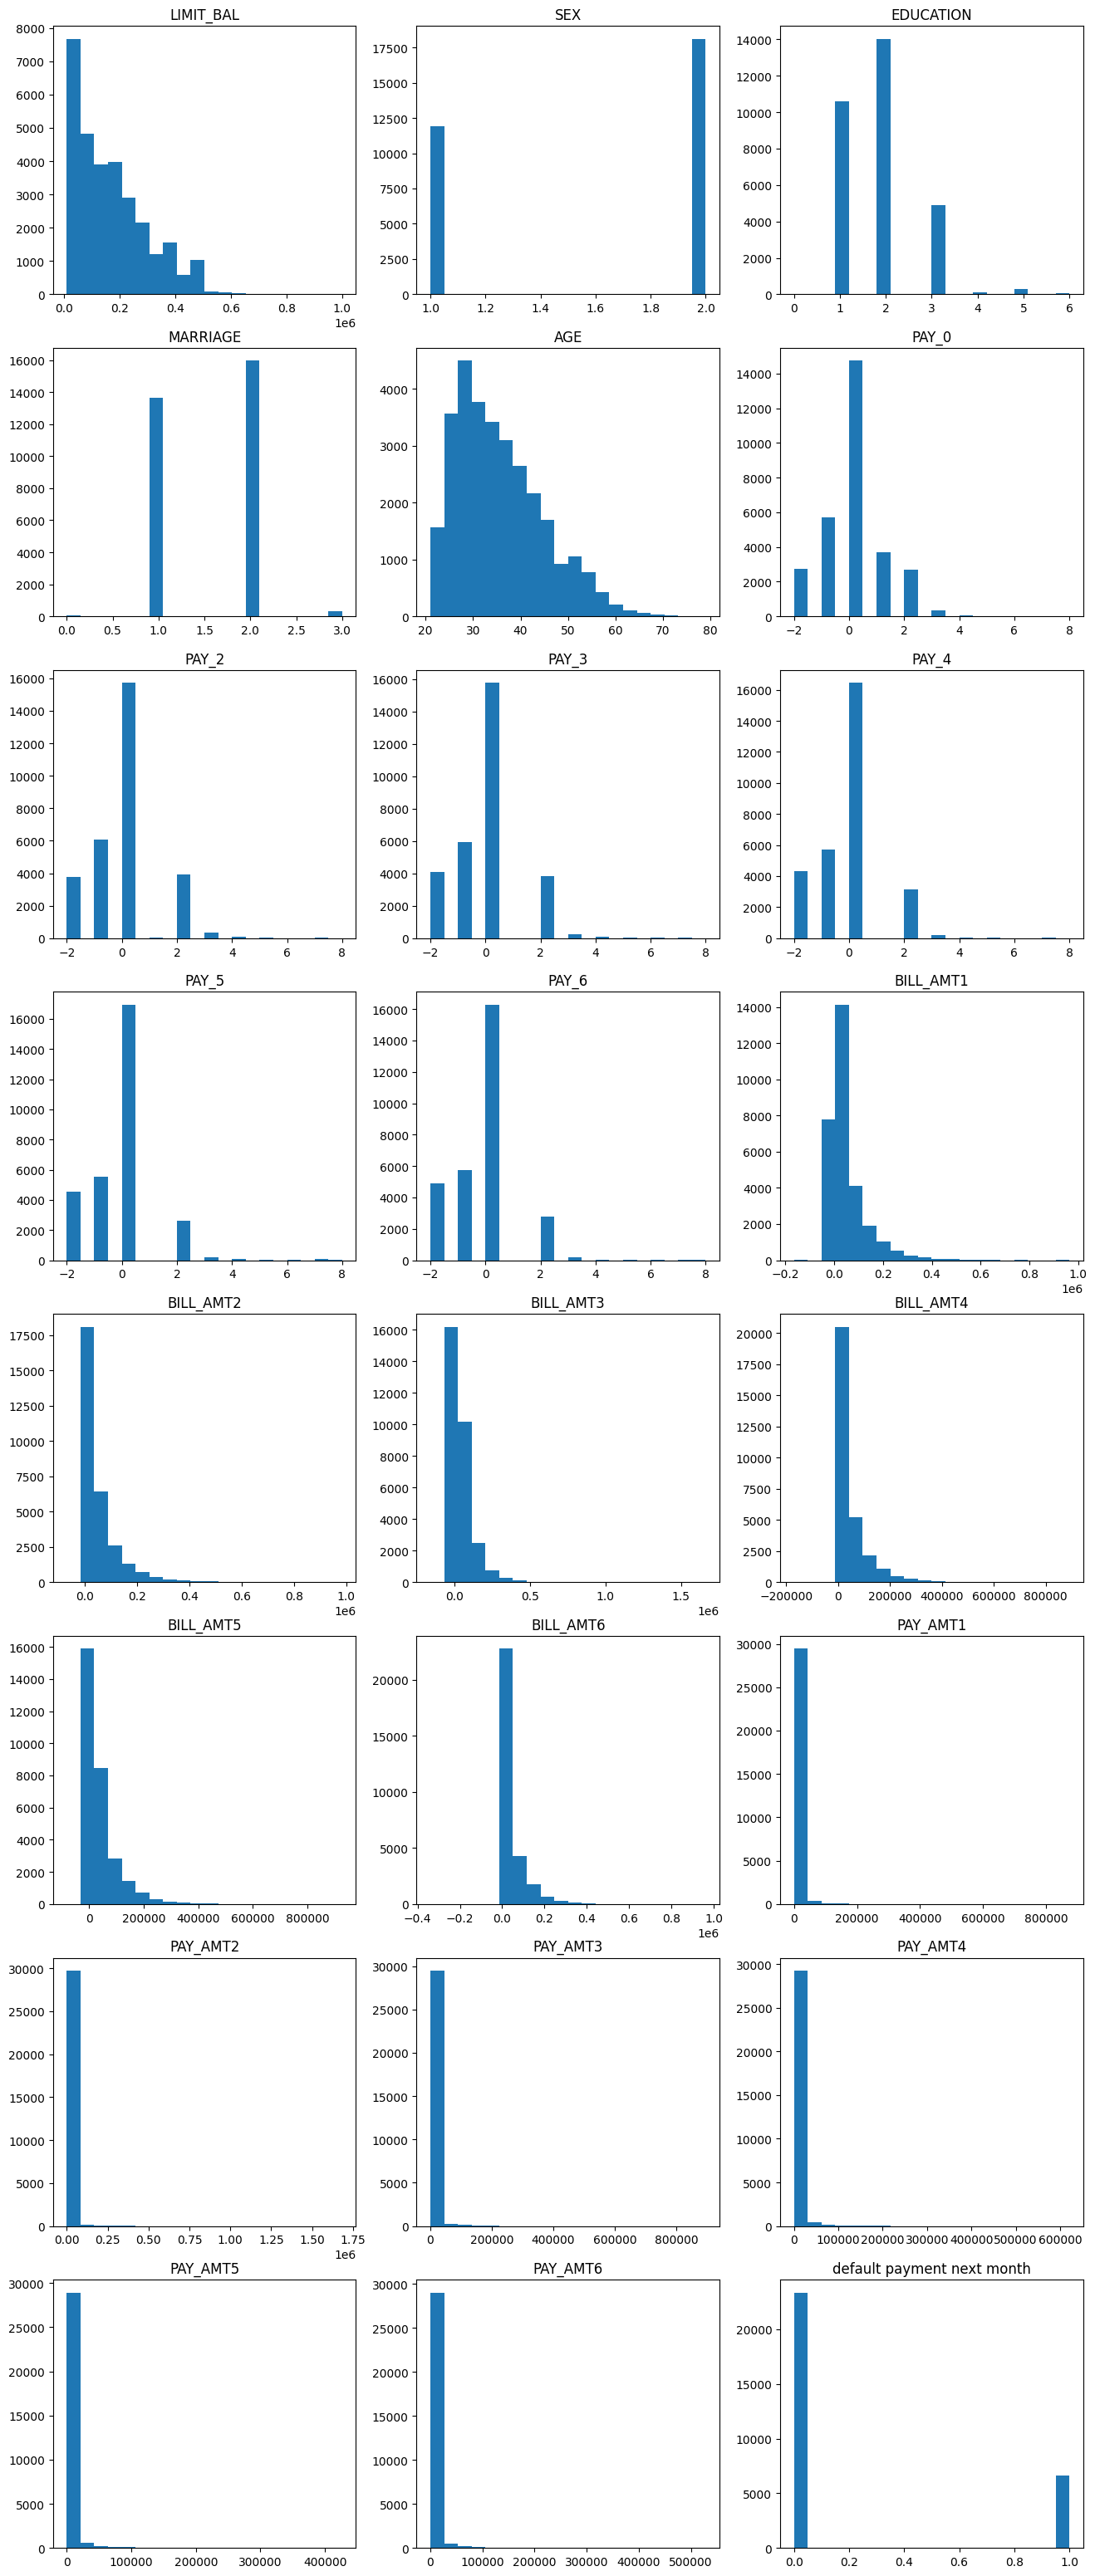

In [10]:
size = len(df.columns)
plt.figure(figsize=(size-8,5*size), dpi=100)

for j, i in enumerate(df.columns):
    plt.subplot(24, 3, j+1)
    plt.hist(df[i], bins=20)
    # sns.kdeplot(df[i])
    plt.title(i)
plt.show()


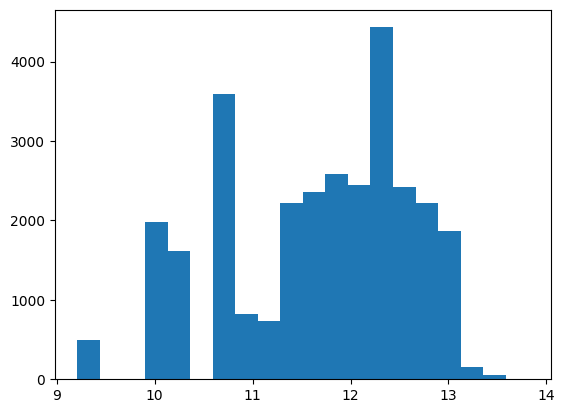

In [11]:
df['LIMIT_BAL_log'] = np.log(df['LIMIT_BAL'])
plt.hist(df['LIMIT_BAL_log'], bins=20)
plt.show()
df.drop('LIMIT_BAL', axis=1, inplace=True)

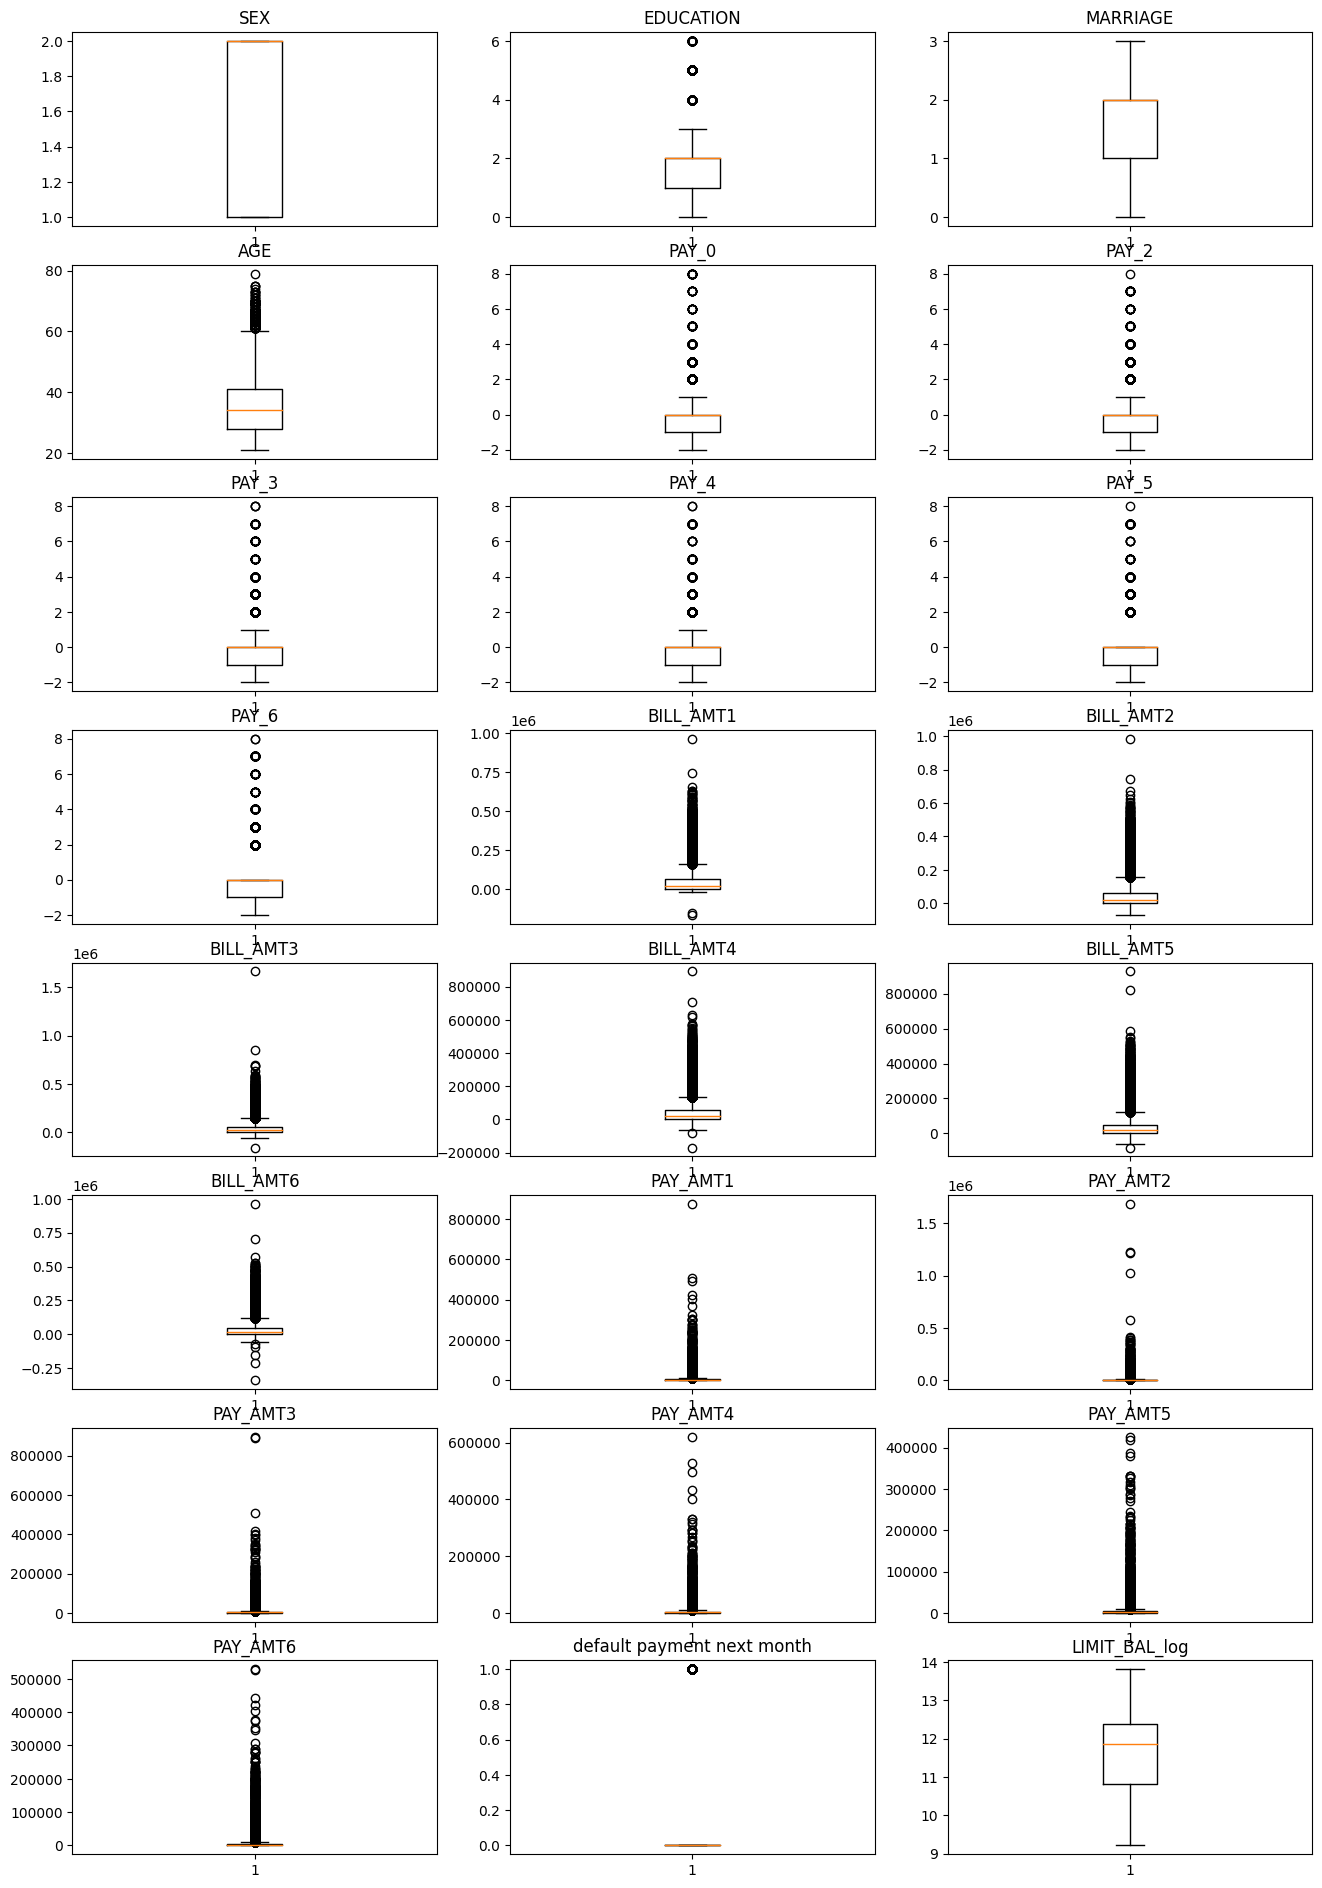

In [12]:
size = len(df.columns)
plt.figure(figsize=(size-8,3*size), dpi=100)

for j, i in enumerate(df.columns):
    plt.subplot(24, 3, j+1)
    plt.boxplot(df[i])
    plt.title(i)
plt.show()

In [13]:
df2 = df.copy()
df2.drop('default payment next month' ,axis=1, inplace=True)
df2.shape

(30000, 23)

In [14]:
for i in df2.columns:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3 - q1
    # df2 = df2[~((df2[i] < (q1 - 1.5 * iqr)) |(df2[i] > (q3 + 1.5 * iqr)))]
    df2[i] = np.where(df2[i] > (q3 + 1.5 * iqr), q3 + 1.5 * iqr, df2[i])
    df2[i] = np.where(df2[i] < (q1 - 1.5 * iqr), q1 - 1.5 * iqr, df2[i])
df2.shape

(30000, 23)

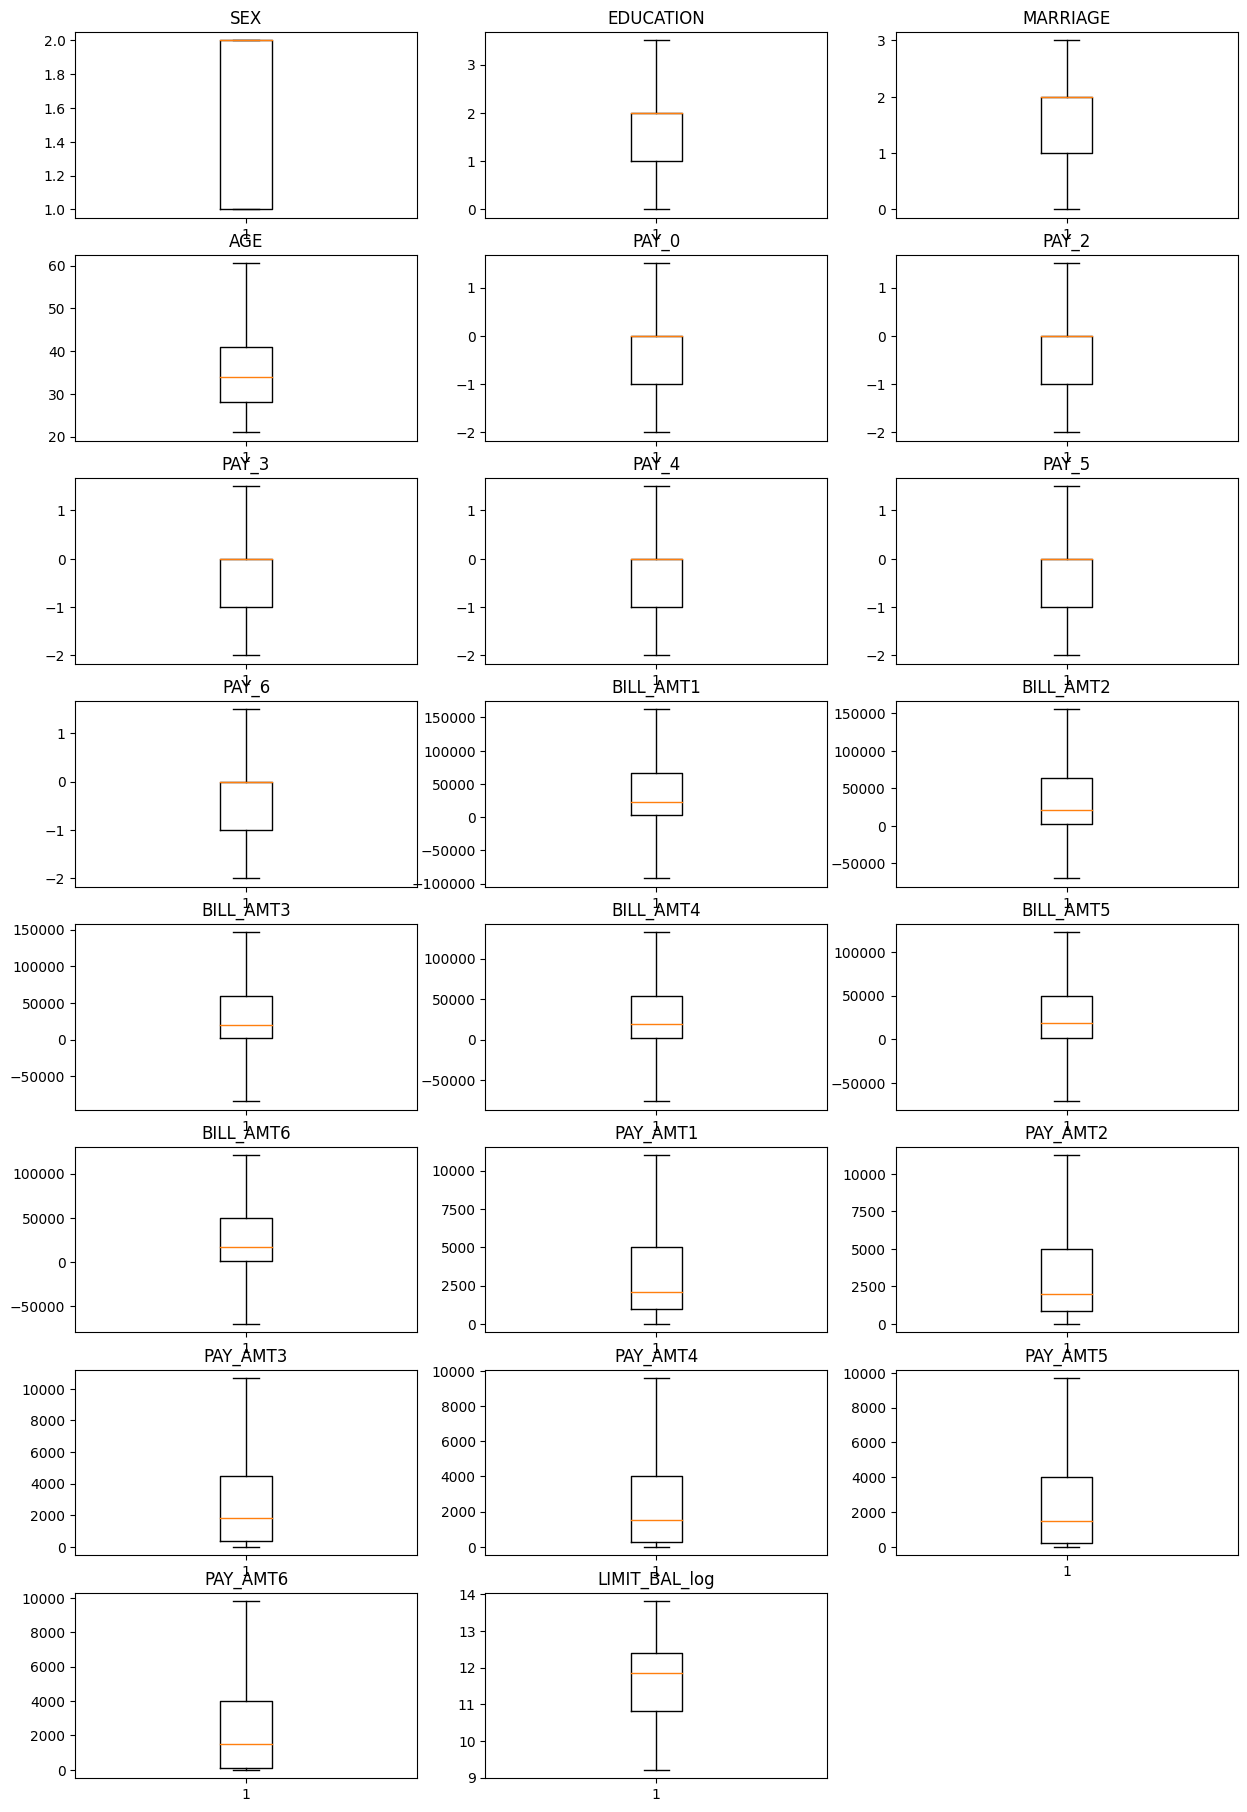

In [15]:
size = len(df2.columns)
plt.figure(figsize=(size-8,3*size), dpi=100)

for j, i in enumerate(df2.columns):
    plt.subplot(24, 3, j+1)
    plt.boxplot(df2[i])
    plt.title(i)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_log
0,0.810161,0.230777,-1.057295,-1.257372,1.674463,1.746729,-0.743681,-0.717876,-1.752244,-1.685337,...,-0.854980,-0.846067,-0.827978,-1.001158,-0.773703,-0.904708,-0.884502,-0.882842,-0.866920,-1.869598
1,0.810161,0.230777,0.858557,-1.037733,-0.951679,1.746729,0.260863,0.313506,0.358003,1.919588,...,-0.778444,-0.759465,-0.745143,-1.001158,-0.685670,-0.606697,-0.559114,-0.882842,-0.228173,0.034263
2,0.810161,0.230777,0.858557,-0.159179,0.098778,0.234293,0.260863,0.313506,0.358003,0.374620,...,-0.519758,-0.471387,-0.433004,-0.566536,-0.544137,-0.606697,-0.559114,-0.559640,0.729948,-0.271418
3,0.810161,0.230777,-1.057295,0.170278,0.098778,0.234293,0.260863,0.313506,0.358003,0.374620,...,-0.192677,-0.120193,-0.077427,-0.428533,-0.397227,-0.547095,-0.526575,-0.537339,-0.547546,-0.895980
4,-1.234323,0.230777,-1.057295,2.366663,-0.951679,0.234293,-0.743681,0.313506,0.358003,0.374620,...,-0.365165,-0.366162,-0.342014,-0.428533,2.215885,2.075405,2.043994,-0.660155,-0.650065,-0.895980


In [17]:
from sklearn.metrics import f1_score
def cal(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)

  y_pred_train = model.predict(x_train)
  f1_train = f1_score(y_train , y_pred_train)

  y_pred = model.predict(x_test)
  f1_test = f1_score(y_test, y_pred)

  return f1_train, f1_test


In [18]:
def effect(train_score, test_score, x, title):
  plt.figure(figsize=(10, 5), dpi=100)
  plt.plot(x, train_score, label='train', color='red')
  plt.plot(x, test_score, label='test', color='green')
  plt.title(title)
  plt.legend()
  plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
x = df2
y = df['default payment next month']
nestimator = [i for i in range (1,600,10)]
train = []
test = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
for i in nestimator:
  model = RandomForestClassifier(n_jobs=-1, random_state=41, n_estimators=i, criterion='entropy', max_depth=7, class_weight='balanced_subsample')
  f1_train, f1_test = cal(model, x_train, x_test, y_train, y_test)
  train.append(f1_train)
  test.append(f1_test)

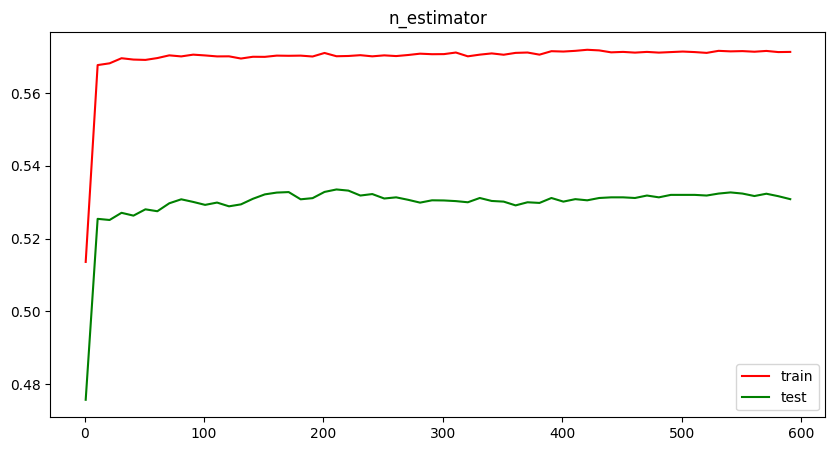

In [20]:
effect(train, test, nestimator, 'n_estimator')

In [24]:
model2 = RandomForestClassifier(n_jobs=-1, random_state=41, n_estimators=210, criterion='entropy', max_depth=7, class_weight='balanced_subsample')
model2.fit(x_train, y_train)
y_pred_train = model2.predict(x_train)
print(classification_report(y_train, y_pred_train))
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     18677
           1       0.52      0.63      0.57      5323

    accuracy                           0.79     24000
   macro avg       0.71      0.73      0.72     24000
weighted avg       0.81      0.79      0.80     24000

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4687
           1       0.48      0.60      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [22]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
prediction = np.concatenate ((y_pred_train.reshape(-1,1), y_pred.reshape(-1,1)))
df['prediction'] = prediction
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_log,prediction
1,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,9.903488,0
2,2,2,2,26,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,1,11.695247,0
3,2,2,2,34,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,11.407565,0
4,2,2,1,37,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,10.819778,0
5,1,2,1,57,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,10.819778,0


In [31]:
df['prediction'].value_counts()

,count
prediction,
0,21960
1,8040


In [32]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636
